<a href="https://colab.research.google.com/github/MrZuberi/Lung-Cancer-Diagnostic-Tool/blob/main/Lung_Cancer_Predictive_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Dataset***

In [ ]:
import kagglehub
khwaishsaxena_lung_cancer_dataset_path = kagglehub.dataset_download('khwaishsaxena/lung-cancer-dataset')

print('Data source import complete.')


Data source import complete.


# ***Initial Data Exploration***

In [ ]:
df = pd.read_csv("/kaggle/input/lung-cancer-dataset/Lung Cancer.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [ ]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

## ***Regarding OHE***
Since all present countries are nearly equally distributed I will keep all of them.

In [ ]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


## ***To calculate the number of days treatment was given we subtracted the end date by the diagnosis date***

In [ ]:
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

df['treatment_duration_days'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

df.drop(['diagnosis_date', 'end_treatment_date'], axis=1, inplace=True)

In [ ]:
columns_to_encode = ['gender', 'country', 'family_history', 'smoking_status', 'treatment_type']

df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [ ]:
df['cancer_stage'].value_counts()

,count
cancer_stage,
Stage III,222594
Stage IV,222527
Stage I,222516
Stage II,222363


In [ ]:
stage_order = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']

df['cancer_stage'] = pd.Categorical(df['cancer_stage'], categories=stage_order, ordered=True).codes

In [ ]:
df.head()

,id,age,cancer_stage,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,...,country_Slovenia,country_Spain,country_Sweden,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,1,64.0,0,29.4,199,0,0,1,0,0,...,False,False,True,True,False,False,True,False,False,False
1,2,50.0,2,41.2,280,1,1,0,0,1,...,False,False,False,True,False,False,True,False,False,True
2,3,65.0,2,44.0,268,1,1,0,0,0,...,False,False,False,True,True,False,False,True,False,False
3,4,51.0,0,43.0,241,1,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,5,37.0,0,19.7,178,0,0,0,0,0,...,False,False,False,False,False,False,True,True,False,False


In [42]:
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

# ***Select Ensemble Model Type***

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['id','survived'],axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7795880149812734


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))

Precision: 0.18421052631578946
Recall: 0.00010817326266013507


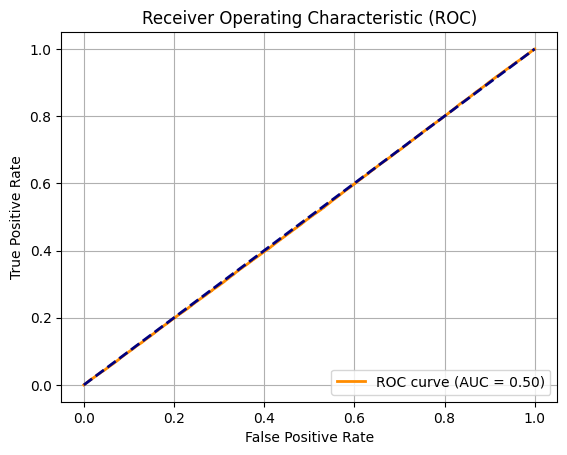

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## ***The Model Outputs below Average Results***

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7796697310180456
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


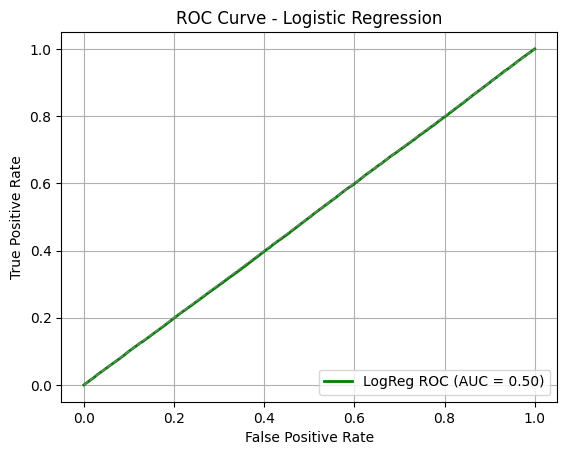

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'LogReg ROC (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# ***Test Prompt***



In [32]:
# This dictionary displays factitious patient data
user_input = {
    'age': 65,
    'gender': 'Female',
    'country': 'USA',
    'cancer_stage': 'Stage II',
    'cholesterol_level': '182',
    'asthma': '0',
    'family_history_Yes': '1'
}

In [37]:
user_df = pd.DataFrame([user_input])

stage_order = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']
user_df['cancer_stage'] = user_df['cancer_stage'].apply(lambda x: stage_order.index(x) if x in stage_order else -1)

columns_to_encode = ['gender', 'country', 'family_history', 'smoking_status', 'treatment_type']

for col in columns_to_encode:
    if col not in user_df.columns:
        user_df[col] = None # Add missing categorical columns

user_df = pd.get_dummies(user_df, columns=columns_to_encode, drop_first=True)

missing_cols = set(X_train.columns) - set(user_df.columns)
for c in missing_cols:
    user_df[c] = 0

user_df = user_df[X_train.columns]

user_df = user_df.astype(X_train.dtypes)

display(user_df)

,age,cancer_stage,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_duration_days,gender_Male,...,country_Slovenia,country_Spain,country_Sweden,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,65.0,1,0.0,182,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


**Explanation**:
Use the trained XGBoost model to predict the survival outcome and the probability of survival for the preprocessed user input.



In [41]:
prediction = model.predict(user_df)
prediction_probability = model.predict_proba(user_df)[:, 1]

print("Predicted Survival Outcome:", prediction[0])
print("Predicted Survival Probability: {:.2f}".format(prediction_probability[0]))

Predicted Survival Outcome: 0
Predicted Survival Probability: 0.23


## Summary:

### Data Analysis Key Findings

*   The user input was successfully transformed into a pandas DataFrame matching the structure and data types of the training data, containing 43 columns and 1 row.
*   The trained XGBoost model predicted a survival outcome of 0 for the test patient.
*   The predicted probability of survival for the test patient is 0.23.

### Insights or Next Steps

*   The low predicted survival probability (0.23) indicates a high risk of non-survival for this specific patient profile according to the model.
*   Further analysis could involve understanding the key features that contributed most significantly to this prediction for this particular patient.
